In [6]:
import pandas as pd
import re

In [ ]:
# Download wikipedia dump from https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2
!wget https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles-multistream.xml.bz2

--2025-02-18 20:06:31--  https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles-multistream.xml.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 2620:0:861:3:208:80:154:71, 208.80.154.71
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|2620:0:861:3:208:80:154:71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24642610651 (23G) [application/octet-stream]
Saving to: ‘enwiki-latest-pages-articles-multistream.xml.bz2’

enwiki-latest-pages 100%[===================>]  22.95G  4.59MB/s    in 86m 21s 

2025-02-18 21:32:52 (4.54 MB/s) - ‘enwiki-latest-pages-articles-multistream.xml.bz2’ saved [24642610651/24642610651]



In [ ]:
# Download index file from https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles-multistream-index.txt.bz2
# This file is used to find the byte offset of each article in the dump
!wget https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles-multistream-index.txt.bz2

--2025-02-18 20:00:23--  https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles-multistream-index.txt.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 2620:0:861:3:208:80:154:71, 208.80.154.71
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|2620:0:861:3:208:80:154:71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 267766383 (255M) [application/octet-stream]
Saving to: ‘enwiki-latest-pages-articles-multistream-index.txt.bz2’

enwiki-latest-pages 100%[===================>] 255.36M  4.51MB/s    in 56s     

2025-02-18 20:01:19 (4.54 MB/s) - ‘enwiki-latest-pages-articles-multistream-index.txt.bz2’ saved [267766383/267766383]



In [7]:
# Extract wikipedia index file
#!bzip2 -d enwiki-latest-pages-articles-multistream-index.txt.bz2

# Parse wikipedia index file to extract movie indices
%run -i ../tools/parse_movie_index.py --index_file enwiki-latest-pages-articles-multistream-index.txt --out_file movie_index.txt

In [ ]:
# Extract movie articles from wikipedia dump and create a csv file
%run -i ../tools/process_wiki_dump.py --dump_file enwiki-latest-pages-articles-multistream.xml.bz2 --index_file movie_index.txt --out_file ../download/movies.csv

In [91]:
# read movies database
movie_db = pd.read_csv('movies.csv').rename(columns=lambda x: x.strip().replace(" ", ""))


In [92]:
# print sample of movies database
movie_db.head()

,id,title,cast,plot,poster
0,3947,Blue Velvet (film),{{cast listing|<!-- Cast is in credits order ...,<!-- Per WP:FILMPLOT plot summaries for featu...,https://upload.wikimedia.org/wikipedia/en/f/fd...
1,4231,Buffy the Vampire Slayer (film),{{Cast listing|* [[Kristy Swanson]] as [[Buff...,[[Buffy Summers]] is a cheerleader at Hemery H...,https://upload.wikimedia.org/wikipedia/en/0/09...
2,4729,Batman &amp; Robin (film),{{div col}}* [[Arnold Schwarzenegger]] as [[V...,<!-- Per WP:FILMPLOT plot summaries for featu...,https://upload.wikimedia.org/wikipedia/en/3/37...
3,11585,Show Me Love (film),* [[Alexandra Dahlström]] as Elin Olsson* [[R...,Two girls Agnes and Elin attend school in th...,https://upload.wikimedia.org/wikipedia/en/9/96...
4,19055,Manufacturing Consent (film),None,The film presents and illustrates Chomsky and ...,https://upload.wikimedia.org/wikipedia/en/1/11...


In [93]:
# print information about movies database
movie_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16299 entries, 0 to 16298
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16299 non-null  int64 
 1   title   16299 non-null  object
 2   cast    16299 non-null  object
 3   plot    16288 non-null  object
 4   poster  16299 non-null  object
dtypes: int64(1), object(4)
memory usage: 636.8+ KB


In [94]:
def clean_column(text):
    """Removes Wikipedia markup, unnecessary tags, and extracts names."""
    if pd.isna(text) or text.lower() == "none":
        return "Unknown"
    
    # Remove Wikipedia templates, comments, and unnecessary symbols
    text = re.sub(r"\{\{.*?\}\}", "", text)  # Remove Wikipedia template tags
    text = re.sub(r"<!--.*?-->", "", text)  # Remove HTML comments
    text = re.sub(r"\[\[(?:[^\]|]*\|)?([^\]]+)\]\]", r"\1", text)  # Extract names from Wikipedia links
    text = re.sub(r"\*", "", text)  # Remove asterisks used for listing
    
    return text.strip()


In [95]:
# movie_db.dropna(inplace=True)

In [96]:
# Remove markup from cast and plot column
movie_db["cast"] = movie_db["cast"].apply(clean_column)
movie_db["plot"] = movie_db["plot"].apply(clean_column)


In [97]:
# Print clean data
movie_db

,id,title,cast,plot,poster
0,3947,Blue Velvet (film),,College student Jeffrey Beaumont returns to hi...,https://upload.wikimedia.org/wikipedia/en/f/fd...
1,4231,Buffy the Vampire Slayer (film),Appearing in uncredited roles are Ben Affleck ...,Buffy Summers is a cheerleader at Hemery High ...,https://upload.wikimedia.org/wikipedia/en/0/09...
2,4729,Batman &amp; Robin (film),Arnold Schwarzenegger as Dr. Victor Fries / Mr...,Batman and his partner Robin encounter a new...,https://upload.wikimedia.org/wikipedia/en/3/37...
3,11585,Show Me Love (film),Alexandra Dahlström as Elin Olsson Rebecka Lil...,Two girls Agnes and Elin attend school in th...,https://upload.wikimedia.org/wikipedia/en/9/96...
4,19055,Manufacturing Consent (film),None,The film presents and illustrates Chomsky and ...,https://upload.wikimedia.org/wikipedia/en/1/11...
...,...,...,...,...,...
16294,79045397,Ithaqua (film),Luke Hemsworth Kevin Durand Michael Pitt Craig...,Survivors in a remote outpost in 19th century ...,https://upload.wikimedia.org/wikipedia/en/d/df...
16295,79045789,DraftThe Bitter End (film),Joan Collins as Wallis Simpson,The film documents the later years in the life...,https://upload.wikimedia.org/wikipedia/en/d/df...
16296,79057912,Vari (film),Ahmed Sharumeel as Abeeru Ashiyath Zaheena as ...,Abeeru a dedicated yet emotionally distant me...,https://upload.wikimedia.org/wikipedia/en/0/07...
16297,79078126,Selena y Los Dinos (film),None,Explores the life and impact of Selena told t...,https://upload.wikimedia.org/wikipedia/en/4/44...


In [98]:
# print cast in sample row
print(movie_db["cast"].iloc[1])

Appearing in uncredited roles are Ben Affleck as a basketball player  Ricki Lake as Charlotte  Seth Green as a vampire  and Alexis Arquette as the vampire DJ.


In [15]:
def extract_actors(text):
    """Extract actors from the cast column."""
    if pd.isna(text) or text.lower() == "none" or text.lower() == "unknown":
        return ""
    actors = ", ".join(re.findall(r"\b([A-Z][a-z]+(?:\s[A-Z][a-z]+)*)\s+as", text))
    if actors == "":
        return text
    else:
        return actors

In [16]:
# Get the actors list
movie_db["actors"] = movie_db["cast"].apply(extract_actors)

In [14]:
movie_db

,id,title,cast,plot,poster,actors
0,3947,Blue Velvet (film),,College student Jeffrey Beaumont returns to hi...,https://upload.wikimedia.org/wikipedia/en/f/fd...,
1,4231,Buffy the Vampire Slayer (film),Appearing in uncredited roles are Ben Affleck ...,Buffy Summers is a cheerleader at Hemery High ...,https://upload.wikimedia.org/wikipedia/en/0/09...,"Ben Affleck, Ricki Lake, Seth Green, Alexis Ar..."
2,4729,Batman &amp; Robin (film),Arnold Schwarzenegger as Dr. Victor Fries / Mr...,Batman and his partner Robin encounter a new...,https://upload.wikimedia.org/wikipedia/en/3/37...,"Arnold Schwarzenegger, George Clooney, Eric Ll..."
3,11585,Show Me Love (film),Alexandra Dahlström as Elin Olsson Rebecka Lil...,Two girls Agnes and Elin attend school in th...,https://upload.wikimedia.org/wikipedia/en/9/96...,"Elin Olsson Rebecka Liljeberg, Agnes Ahlberg E..."
4,19055,Manufacturing Consent (film),None,The film presents and illustrates Chomsky and ...,https://upload.wikimedia.org/wikipedia/en/1/11...,
...,...,...,...,...,...,...
16293,79040652,Late Shift (film),Leonie Benesch as Floria Sonja Riesen as Bea S...,Floria a devoted surgical nurse in Switzerlan...,https://upload.wikimedia.org/wikipedia/en/e/e9...,"Leonie Benesch, Floria Sonja Riesen, Bea Schmi..."
16294,79045397,Ithaqua (film),Luke Hemsworth Kevin Durand Michael Pitt Craig...,Survivors in a remote outpost in 19th century ...,https://upload.wikimedia.org/wikipedia/en/d/df...,Luke Hemsworth Kevin Durand Michael Pitt Craig...
16295,79045789,DraftThe Bitter End (film),Joan Collins as Wallis Simpson,The film documents the later years in the life...,https://upload.wikimedia.org/wikipedia/en/d/df...,Joan Collins
16296,79057912,Vari (film),Ahmed Sharumeel as Abeeru Ashiyath Zaheena as ...,Abeeru a dedicated yet emotionally distant me...,https://upload.wikimedia.org/wikipedia/en/0/07...,"Ahmed Sharumeel, Abeeru Ashiyath Zaheena, Shar..."


In [15]:
# Experiment 1: TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [16]:
# Step 1: Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    stop_words='english',  # Remove common English words (e.g., "the", "a")
    max_df=0.85,           # Ignore terms that appear in >85% of documents
    min_df=1,              # Include terms that appear in at least 1 document
)

In [17]:
# Step 2: Transform movie plots into TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(movie_db['plot'])

In [18]:
# Step 3: Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [19]:
# Step 4: Function to get recommendations
def get_recommendations(title, cosine_sim=cosine_sim, movies=movie_db):
    # Get the index of the movie that matches the title
    idx = movie_db.index[movie_db['title'].str.contains(rf"\b{title}\b")].to_list()[0]
    
    # Get similarity scores for all movies with the given movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort movies based on similarity scores (descending order)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top 3 most similar movies (excluding the movie itself)
    sim_scores = sim_scores[1:6]
    
    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the titles of recommended movies
    return movie_db['title'].iloc[movie_indices]

In [20]:
# Test the recommendation system
movie_title = 'Titanic'
recommendations = get_recommendations(movie_title)
print(f"Recommendations for '{movie_title}':")
print(recommendations)

Recommendations for 'Titanic':
10956    If Ever I See You Again (film)
2328                     My Life (film)
12205             Superpowerless (film)
7234                  Mary  Mary (film)
1461             White Christmas (film)
Name: title, dtype: object


In [31]:
# Experiment 2: Doc2Vec Embedding
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from gensim.utils import simple_preprocess

# Step 1: Tokenize movie plots
tagged_documents = [
    TaggedDocument(
        words=simple_preprocess(plot),  # Tokenize and preprocess (lowercase, remove punctuation)
        tags=[str(i)]                   # Unique tag for each document (e.g., '0', '1', ...)
    )
    for i, plot in enumerate(movie_db["plot"])
]
# Step 2: Train Doc2Vec model
max_epochs = 10
vec_size = 20
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)

model.build_vocab(tagged_documents)

for epoch in range(max_epochs):
    model.train(tagged_documents,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha


In [52]:
# Step 3: Save the model to disk
model.save("doc2vec_movie_model")
print("Model saved to 'doc2vec_movie_model'")

Model saved to 'doc2vec_movie_model'


In [126]:
# Load the model from disk for future use
from gensim.models.doc2vec import Doc2Vec
from nltk.tokenize import word_tokenize
import nltk
from gensim.utils import simple_preprocess
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
nltk.download('punkt')

model = Doc2Vec.load("doc2vec_movie_model")

[nltk_data] Downloading package punkt to /Users/mahadev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [133]:
# Step 4: Function to get recommendations
def get_recommendations_doc2vec(title, model, movies=movie_db, top_n=5):
    # Get the index of the movie that matches the title
    print("matching title", title)
    idx = movie_db[movie_db['title'].str.contains(rf"\b{title}\b", case=False, na=False, regex=True)].index[0]
    print("idx", idx)
    
    plot_text = movie_db['plot'].iloc[idx].lower()
    print("title = ", movie_db.iloc[idx]['title'])
    print("plot = ", plot_text)
    
    tokenized_text = simple_preprocess(plot_text)
    text_vector = model.infer_vector(tokenized_text)
    
    # Compute cosine similarity
    similar_movies = cosine_similarity([text_vector], model.dv.vectors)

    # Get top similar documents
    similar_doc_indices = np.argsort(similar_movies[0])[::-1][:top_n]
    print("similar_doc_indices", similar_doc_indices)
        
    # Return the titles of recommended movies
    return movie_db['title'].iloc[similar_doc_indices]


In [134]:
# Test the recommendation system
movie_title = 'Titanic'
recommendations = get_recommendations_doc2vec(movie_title, model, movie_db, 5)
print(f"Recommendations for '{movie_title}':")
print(recommendations)

matching title Titanic
idx 5622
title =  Raise the Titanic (film)
plot =  in the wilds of northern siberia during the cold war  an american spy breaks into an old  snow-covered mine  where he discovers the frozen body of a u.s. army sergeant next to a wooden marker dated 10 february  1912. using a geiger counter  the spy discovers that byzanium  a fictional highly radioactive mineral that could be used in nuclear warfare  was mined there. the spy is quickly discovered and chased out of the mine by a soviet soldier  who shoots him in pursuit. the soviet soldier is then shot and killed by mercenary adventurer and government operative dirk pitt  who rescues the spy and takes him back to washington  d.c.the c.i.a. discovers that the mine was operated by americans and that the raw byzanium ore found there was to be sent back to the united states. the byzanium was packaged into wooden shipping boxes by an american named brewster and loaded onboard the ''titanic''  which sank on its maiden vo

Index([ 7924,  2380, 13577,  2252,  7247, 15690, 10768, 11319, 13272,  3921,
       12484,  1035,   304,  4333,  5852, 12923, 10763,   102,  2315, 13060,
        8093,   733, 16137,     3,  3372, 13853,  7482, 13660,   290, 14610,
         862,  4015,  9568,  1090,  7720,  9402,  4791,  8757,   291,  1624,
        9798,  7585, 10654,  8486,   254,  2616,  3422, 10149,  9334,  6050],
      dtype='int64')
              x         y                          title
7924   5.276427 -4.093643         Terminal Island (film)
2380   2.594007  4.108107           Ladies' Night (film)
13577  6.087312  1.947961              800 Heroes (film)
2252  -6.505670 -1.464798         Happy Accidents (film)
7247   1.170620 -6.339925                   Hilde (film)
15690  0.266375  0.147262                Shoshana (film)
10768 -4.595279 -6.656015                     Ken (film)
11319 -7.547821 -0.873876                 Klezmer (film)
13272 -0.260959 -0.079403  The Prophet's Paradise (film)
3921   5.041651  3.3888

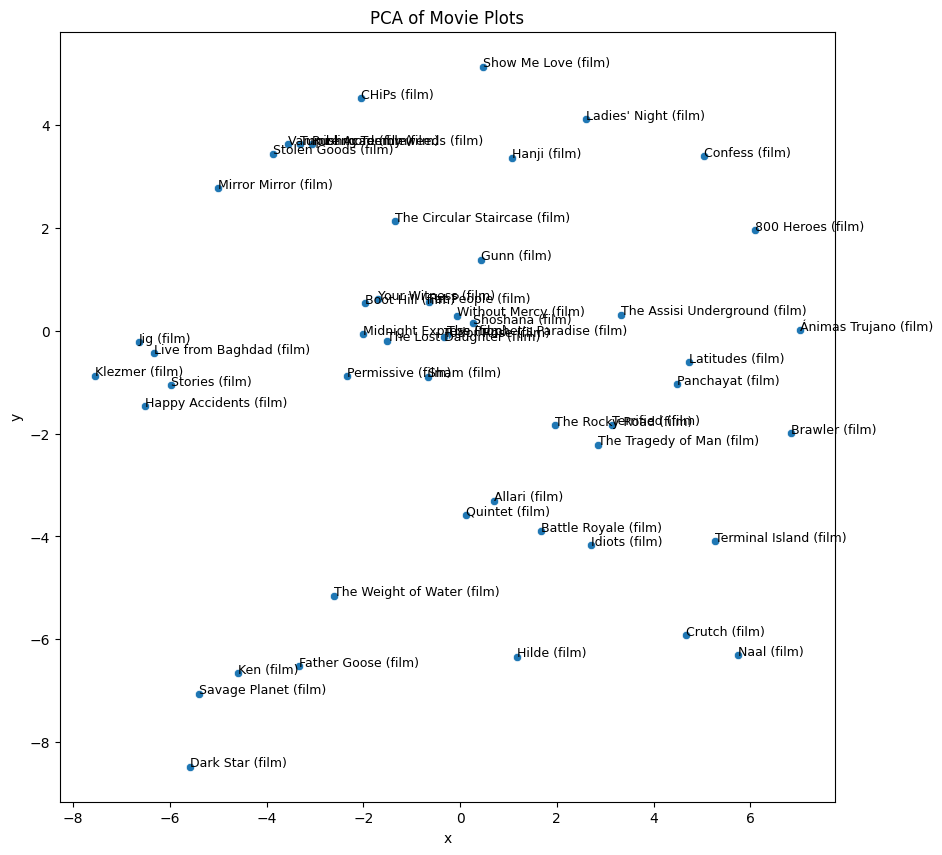

In [143]:
# Principle Component Analysis for visualiazation
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Step 1: Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(model.dv.vectors)

# Step 2: Create a DataFrame for visualization
df = pd.DataFrame(reduced_vectors, columns=['x', 'y'])
df['title'] = movie_db['title']

# Step 3: Plot random 50 movie data points
df_sample = df.sample(50, random_state=42)
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_sample, x='x', y='y')

for i in df_sample.index:
    plt.text(df['x'][i], df['y'][i], df['title'][i], fontsize=9)
plt.title('PCA of Movie Plots')
plt.show()